In [43]:
import pandas as pd
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [28]:
df = pd.DataFrame()

In [35]:
def read_daily_file(f):
    date_text = os.path.splitext(f.split('/')[-1])[0]
    state_df = pd.read_csv(f)
    state_df['Timestamp'] = datetime.strptime(date_text, '%m-%d-%Y')
    return state_df

In [36]:
directory = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
for f in csv_files:
    state_df = read_daily_file(f)
    df = pd.concat([df, state_df], ignore_index=True)

In [30]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Timestamp,People_Tested,Mortality_Rate
0,Alabama,US,2022-01-22 04:32:02,32.3182,-86.9023,1120881,16824,NaN,NaN,1.0,...,6799497.0,NaN,1.500962,84000001.0,USA,138675.106079,NaN,2022-01-21,NaN,NaN
1,Alaska,US,2022-01-22 04:32:02,61.3707,-152.4044,195345,1051,NaN,NaN,2.0,...,3741734.0,NaN,0.538022,84000002.0,USA,511483.777485,NaN,2022-01-21,NaN,NaN
2,American Samoa,US,2022-01-22 04:32:02,-14.2710,-170.1320,18,0,NaN,NaN,60.0,...,2140.0,NaN,0.000000,16.0,ASM,3846.084722,NaN,2022-01-21,NaN,NaN
3,Arizona,US,2022-01-22 04:32:02,33.7298,-111.4312,1701949,25502,NaN,NaN,4.0,...,16792390.0,NaN,1.498400,84000004.0,USA,230705.356452,NaN,2022-01-21,NaN,NaN
4,Arkansas,US,2022-01-22 04:32:02,34.9697,-92.3731,726716,9484,NaN,NaN,5.0,...,4709066.0,NaN,1.305049,84000005.0,USA,156042.804635,NaN,2022-01-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39511,Virginia,US,2021-06-15 04:31:17,37.7693,-78.1700,677812,11318,NaN,NaN,51.0,...,7553224.0,NaN,1.669785,84000051.0,USA,88491.678128,NaN,2021-06-14,NaN,NaN
39512,Washington,US,2021-06-15 04:31:17,47.4009,-121.4905,444722,5782,NaN,NaN,53.0,...,7358062.0,NaN,1.300138,84000053.0,USA,96627.253988,NaN,2021-06-14,NaN,NaN
39513,West Virginia,US,2021-06-15 04:31:17,38.4912,-80.9545,163144,2853,NaN,NaN,54.0,...,2972502.0,NaN,1.748762,84000054.0,USA,165862.621760,NaN,2021-06-14,NaN,NaN
39514,Wisconsin,US,2021-06-15 04:31:17,44.2685,-89.6165,676276,8015,NaN,NaN,55.0,...,8870973.0,NaN,1.185167,84000055.0,USA,152358.498181,NaN,2021-06-14,NaN,NaN


In [31]:
# Population estimates for US States, from census.gov
pop_df = pd.read_csv('nst-est2020.csv')

In [32]:
# Merge the 2 datasets based on the name of the state
# This is to fill in the population data for each state
merge_df = pd.merge(df, pop_df, how='inner', left_on='Province_State', right_on='NAME')

In [33]:
merge_df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,Alabama,US,2022-01-22 04:32:02,32.3182,-86.9023,1120881,16824,NaN,NaN,1.0,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
1,Alabama,US,2022-01-21 04:31:23,32.3182,-86.9023,1104356,16792,NaN,NaN,1.0,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
2,Alabama,US,2021-07-05 04:31:17,32.3182,-86.9023,551298,11358,NaN,NaN,1.0,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
3,Alabama,US,2021-07-06 04:30:55,32.3182,-86.9023,551298,11358,NaN,NaN,1.0,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
4,Alabama,US,2022-02-13 04:31:01,32.3182,-86.9023,1262018,17571,NaN,NaN,1.0,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35407,Wyoming,US,2021-07-29 04:30:41,42.7560,-107.3025,64623,776,NaN,NaN,56.0,...,576656,582620,583159,586389,585243,579994,579054,580116,582030,582328
35408,Wyoming,US,2021-05-27 04:30:49,42.7560,-107.3025,59961,719,NaN,NaN,56.0,...,576656,582620,583159,586389,585243,579994,579054,580116,582030,582328
35409,Wyoming,US,2021-05-28 04:31:06,42.7560,-107.3025,60048,719,NaN,NaN,56.0,...,576656,582620,583159,586389,585243,579994,579054,580116,582030,582328
35410,Wyoming,US,2021-06-16 04:31:11,42.7560,-107.3025,61303,734,NaN,NaN,56.0,...,576656,582620,583159,586389,585243,579994,579054,580116,582030,582328


In [34]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35412 entries, 0 to 35411
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        35412 non-null  object        
 1   Country_Region        35412 non-null  object        
 2   Last_Update           35412 non-null  object        
 3   Lat                   35412 non-null  float64       
 4   Long_                 35412 non-null  float64       
 5   Confirmed             35412 non-null  int64         
 6   Deaths                35412 non-null  int64         
 7   Recovered             14072 non-null  float64       
 8   Active                14072 non-null  float64       
 9   FIPS                  35412 non-null  float64       
 10  Incident_Rate         35412 non-null  float64       
 11  Total_Test_Results    24422 non-null  float64       
 12  People_Hospitalized   5062 non-null   float64       
 13  Case_Fatality_Ra

In [37]:
merge_df['case_rate_by_pop'] = merge_df['Confirmed'] / merge_df['POPESTIMATE2020']

In [38]:
merge_df['death_rate_by_pop'] = merge_df['Deaths'] / merge_df['POPESTIMATE2020']

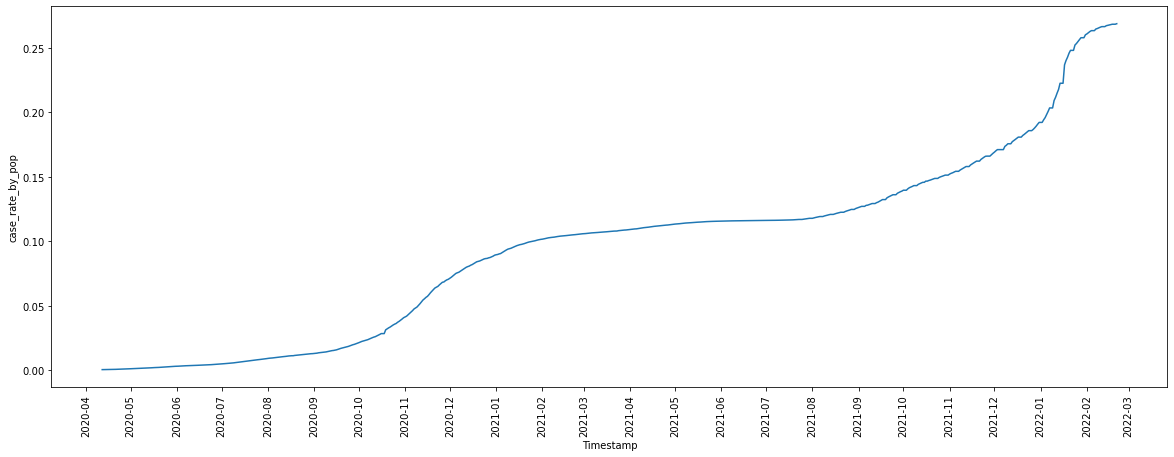

In [51]:
# What is the case rate by population for the state of Wisconsin for all time?
fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(x='Timestamp', y='case_rate_by_pop', data=merge_df[merge_df.Province_State == 'Wisconsin'])
axes.xaxis.set_major_locator(mdates.MonthLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes.xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation = 'vertical')
plt.show()

In [54]:
# What state has the highest death rate by population?
merge_df[merge_df.death_rate_by_pop == max(merge_df.death_rate_by_pop)]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020,case_rate_by_pop,death_rate_by_pop
16399,Mississippi,US,2022-02-19 04:31:19,32.7416,-89.6787,785528,11836,NaN,NaN,28.0,...,2991892,2990231,2990595,2990674,2982879,2978227,2971253,2966786,0.264774,0.00399
16400,Mississippi,US,2022-02-20 04:31:11,32.7416,-89.6787,785528,11836,NaN,NaN,28.0,...,2991892,2990231,2990595,2990674,2982879,2978227,2971253,2966786,0.264774,0.00399
16690,Mississippi,US,2022-02-22 04:31:49,32.7416,-89.6787,785528,11836,NaN,NaN,28.0,...,2991892,2990231,2990595,2990674,2982879,2978227,2971253,2966786,0.264774,0.00399
16691,Mississippi,US,2022-02-21 04:31:10,32.7416,-89.6787,785528,11836,NaN,NaN,28.0,...,2991892,2990231,2990595,2990674,2982879,2978227,2971253,2966786,0.264774,0.00399


In [55]:
# What state has the highest case rate by population?
merge_df[merge_df.case_rate_by_pop == max(merge_df.case_rate_by_pop)]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020,case_rate_by_pop,death_rate_by_pop
27586,Rhode Island,US,2022-02-22 04:31:49,41.6809,-71.5118,354617,3402,NaN,NaN,44.0,...,1056511,1056886,1057816,1056554,1059338,1058158,1058004,1057125,0.335454,0.003218
